### Clean Eaglecrest Dataset Download from Mesowest 

Notebook contents 
* Load data for 5 years at Eaglecrest Mesonet Stations
* Clean the useful variables 
* Save as netcdfs for future use 

created by Cassie Lumbrazo\
last updated: Jan 2025\
run location: UAS linux\
python environment: **xarray**

In [1]:
# import packages 
%matplotlib inline

# plotting packages 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set_theme()
# plt.rcParams['figure.figsize'] = [12,6] #overriding size

# data packages 
import pandas as pd
import numpy as np
import xarray as xr
from datetime import datetime

import scipy

In [2]:
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap
from matplotlib import ticker

In [3]:
pwd

'/home/cassie/python/repos/juneau_data_analysis'

In [5]:
filename = '/home/cassie/data/fishcreek/mesonet/rawdata/DouglasIsland_AllStations_RawData_WY2024.txt'
# filename = '/home/cassie/data/fishcreek/mesonet/rawdata/DouglasIsland_AllStations_RawData_WY2025_until16March2025.txt'

# open
df = pd.read_csv(filename, sep = ",")

# make utc_valid a datetime and index the df by it 
df['datetime'] = pd.to_datetime(df['utc_valid'])
df = df.set_index('datetime')
df.head()

,station,utc_valid,PAIRZZZ,PCIRZZZ,PPDRZZZ,PPIRZZZ,PPPRZZZ,PPVRZZZ,PTIRZZZ,PTPRZZZ,...,USPRZZZ,VVIRZZZ,VVPRZZZ,XCIRZZZ,XCPRZZZ,XPPRZZZ,XPQRZZZ,XRIRZZZ,XWIRZZZ,XWPRZZZ
datetime,,,,,,,,,,,,,,,,,,,,,
2023-10-01 00:00:00,ECEA2,2023-10-01 00:00:00,NaN,NaN,NaN,0.01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN
2023-10-01 00:05:00,ECEA2,2023-10-01 00:05:00,NaN,NaN,NaN,0.01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN
2023-10-01 00:10:00,ECEA2,2023-10-01 00:10:00,NaN,NaN,NaN,0.01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN
2023-10-01 00:15:00,ECEA2,2023-10-01 00:15:00,NaN,NaN,NaN,0.01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN
2023-10-01 00:20:00,ECEA2,2023-10-01 00:20:00,NaN,NaN,NaN,0.01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN


In [9]:
df.station.unique()

array(['ECEA2', 'ECTA2', 'JECA2', 'NDIA2', 'PPSA2', 'SDIA2'], dtype=object)

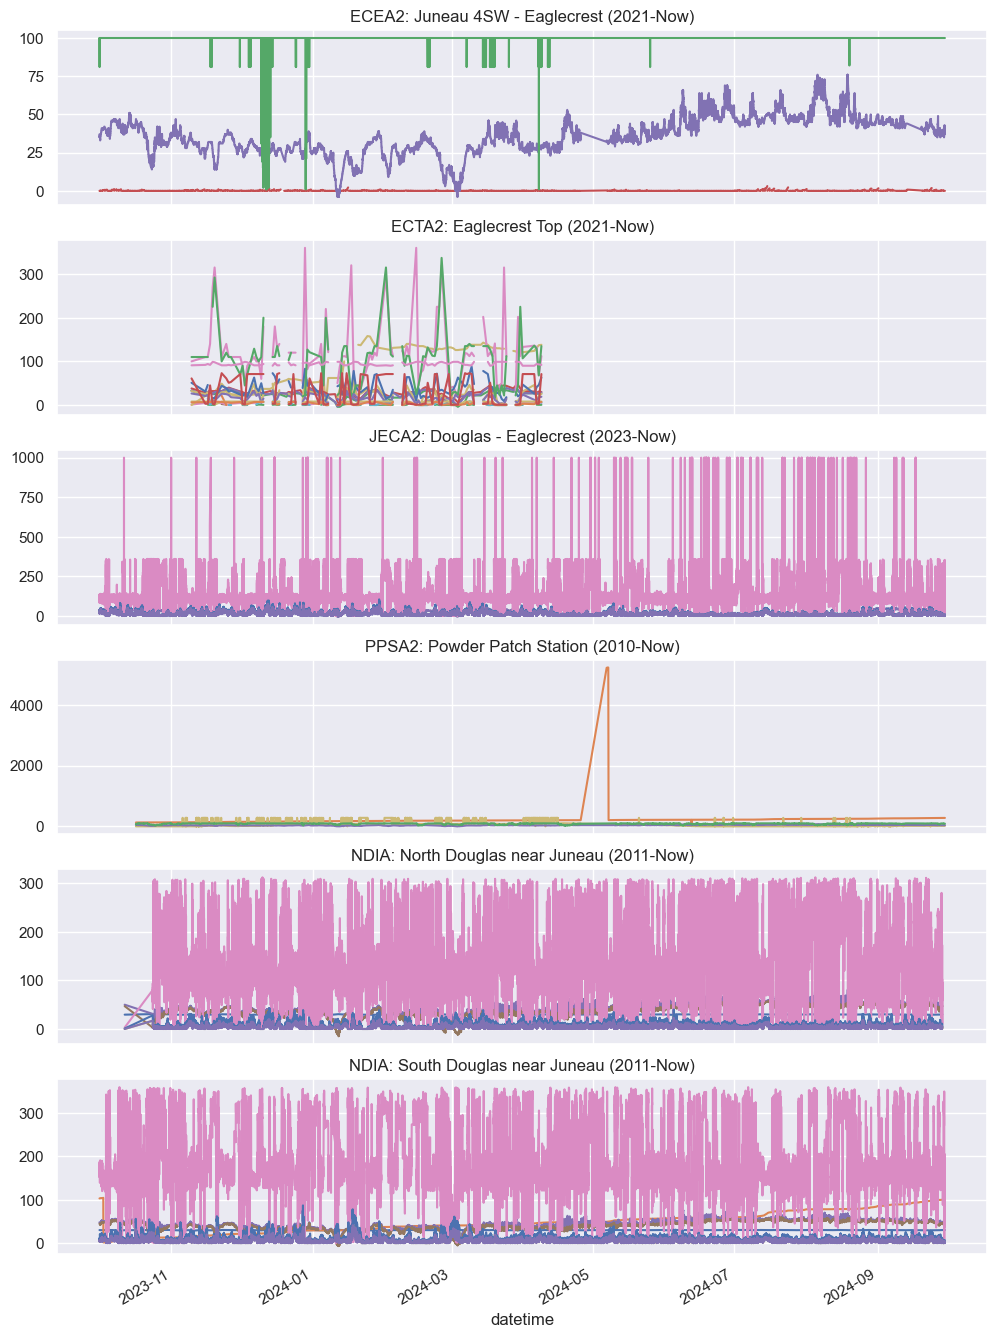

In [11]:
# so let's plot the data by station
fig, ax = plt.subplots(6,1, figsize=(12,18), sharex=True)

df.where(df['station'] == 'ECEA2').plot(ax=ax[0], label='ECEA2', legend=False)
df.where(df['station'] == 'ECTA2').plot(ax=ax[1], label='ECTA2', legend=False)
df.where(df['station'] == 'JECA2').plot(ax=ax[2], label='JECA2', legend=False)
df.where(df['station'] == 'PPSA2').plot(ax=ax[3], label='PPSA2', legend=False)
df.where(df['station'] == 'NDIA2').plot(ax=ax[4], label='NDIA2', legend=False)
df.where(df['station'] == 'SDIA2').plot(ax=ax[5], label='SDIA2', legend=False)

# add a title for each station name
ax[0].set_title('ECEA2: Juneau 4SW - Eaglecrest (2021-Now)')
ax[1].set_title('ECTA2: Eaglecrest Top (2021-Now)')
ax[2].set_title('JECA2: Douglas - Eaglecrest (2023-Now)')
ax[3].set_title('PPSA2: Powder Patch Station (2010-Now)')
ax[4].set_title('NDIA: North Douglas near Juneau (2011-Now)')
ax[5].set_title('NDIA: South Douglas near Juneau (2011-Now)')

plt.show()

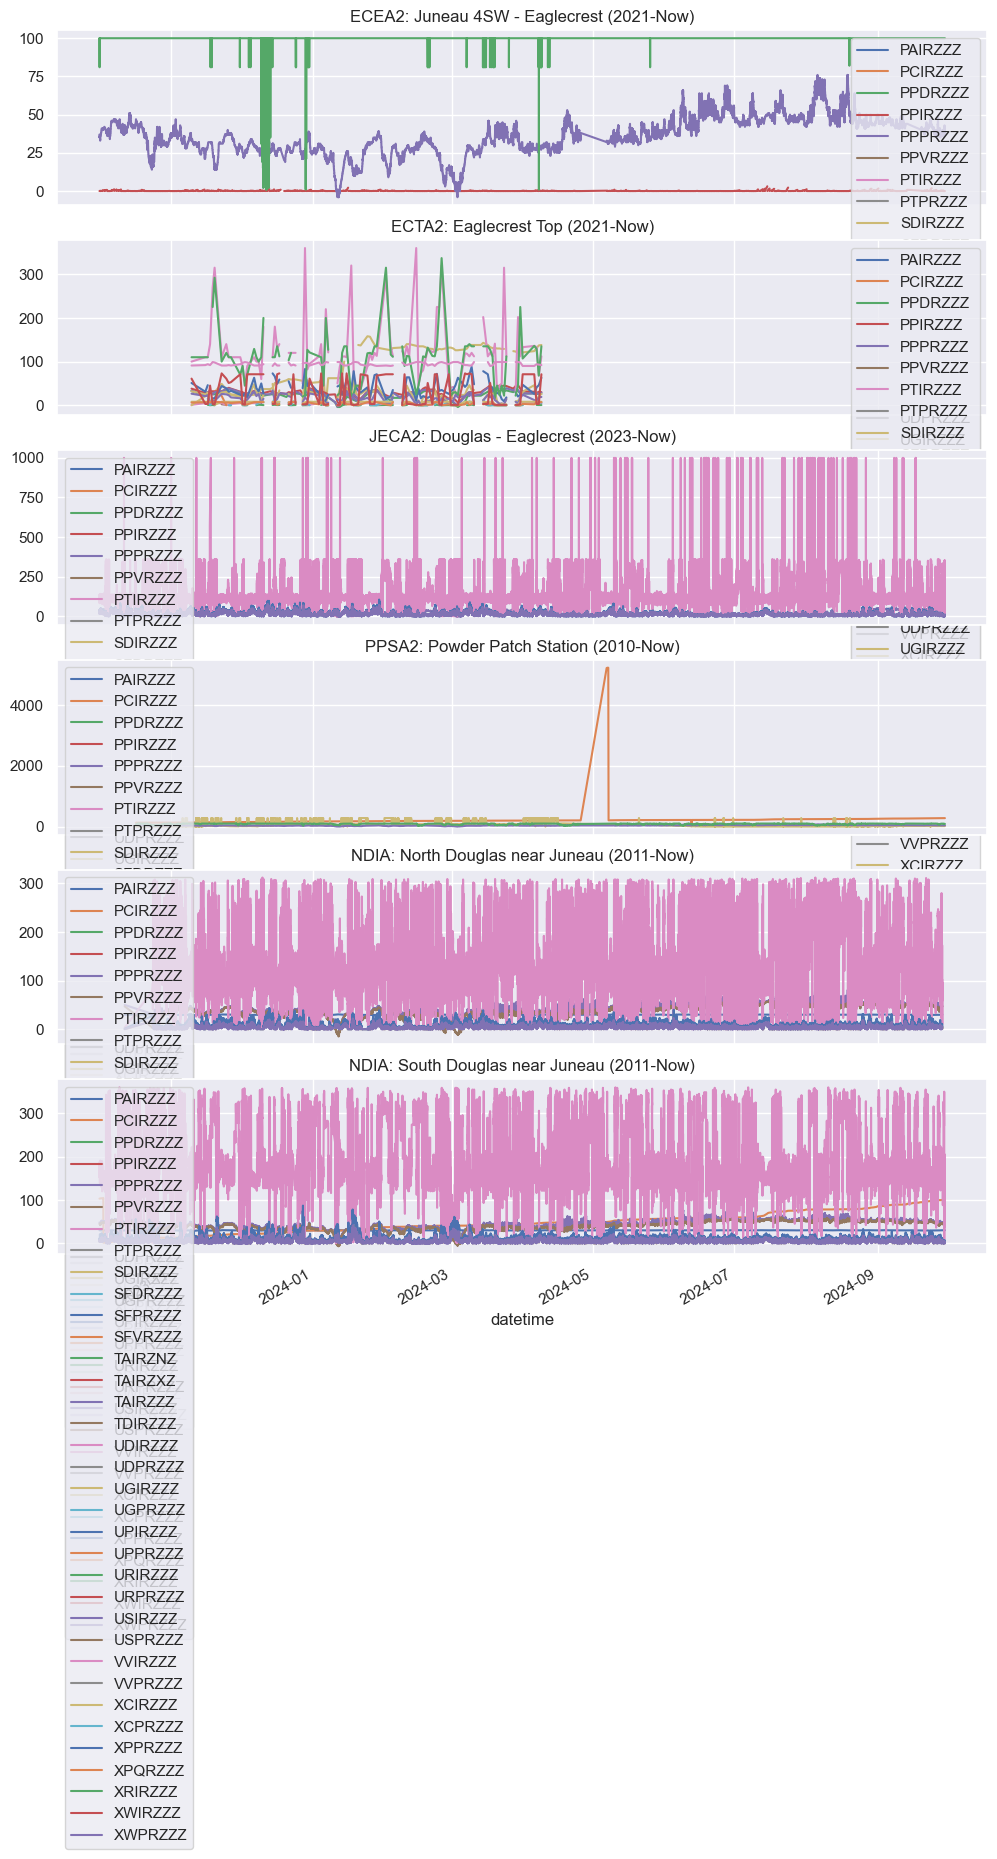

In [12]:
# so let's plot the data by station
fig, ax = plt.subplots(6,1, figsize=(12,18), sharex=True)

df.where(df['station'] == 'ECEA2').plot(ax=ax[0], label='ECEA2', legend=True)
df.where(df['station'] == 'ECTA2').plot(ax=ax[1], label='ECTA2', legend=True)
df.where(df['station'] == 'JECA2').plot(ax=ax[2], label='JECA2', legend=True)
df.where(df['station'] == 'PPSA2').plot(ax=ax[3], label='PPSA2', legend=True)
df.where(df['station'] == 'NDIA2').plot(ax=ax[4], label='NDIA2', legend=True)
df.where(df['station'] == 'SDIA2').plot(ax=ax[5], label='SDIA2', legend=True)

# add a title for each station name
ax[0].set_title('ECEA2: Juneau 4SW - Eaglecrest (2021-Now)')
ax[1].set_title('ECTA2: Eaglecrest Top (2021-Now)')
ax[2].set_title('JECA2: Douglas - Eaglecrest (2023-Now)')
ax[3].set_title('PPSA2: Powder Patch Station (2010-Now)')
ax[4].set_title('NDIA: North Douglas near Juneau (2011-Now)')
ax[5].set_title('NDIA: South Douglas near Juneau (2011-Now)')

plt.show()